The main gol with Explory Data Analysis (EDA) is to answer the following question: 

What are the characteristics the have the most impact on the predicted variable?

To that, we're going through some methods:

* Descriptive Analysis
* GroupBy
* ANOVA
* Correlation
* Correlation - Statistics



### Descriptive Statistics

In [58]:
import pandas as pd

df = pd.DataFrame({"A": [1,2,3,4,1],
                   "B": [10.2,12.2,13.1,10,20],
                   "C": [8,7,5,8,9],
                   "D": ["rafael","kirchhoff","rafael","nicki","kirchhoff"]})

df

,A,B,C,D
0,1,10.2,8,rafael
1,2,12.2,7,kirchhoff
2,3,13.1,5,rafael
3,4,10.0,8,nicki
4,1,20.0,9,kirchhoff


In [8]:
#the describe functions. As we can see, it doesn't show the statistics related to categorial data
df.describe()

,A,B,C
count,5.00000,5.000000,5.000000
mean,2.20000,13.100000,7.400000
std,1.30384,4.075537,1.516575
min,1.00000,10.000000,5.000000
25%,1.00000,10.200000,7.000000
50%,2.00000,12.200000,8.000000
75%,3.00000,13.100000,8.000000
max,4.00000,20.000000,9.000000


In [9]:
#the count function counts the number of elements in each column
df.count()

A    5
B    5
C    5
D    5
dtype: int64

In [10]:
#value_counts is useful to make histograms of categorical data, as it returns the frequency of each value in the dataframe. 
names_counts = df["D"].value_counts()
names_counts

rafael       2
kirchhoff    2
nicki        1
Name: D, dtype: int64

In [42]:
#Box Plots

#Box plots make it easy to compare between groups. 

import seaborn as sns

dataset_url = 'http://bit.ly/2cLzoxH'

gapminder = pd.read_csv(dataset_url)

gapminder.head(3)



,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


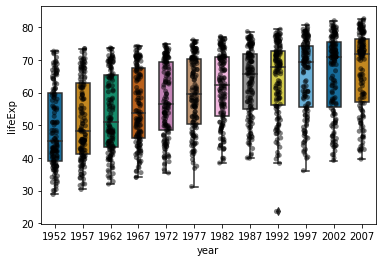

In [44]:
# Here, we're plotting the life expectancy in function of the year. 
sns.boxplot(y = 'lifeExp', x = 'year', data = gapminder, width = 0.5, palette = 'colorblind')
sns.stripplot(y = 'lifeExp', x = 'year', data = gapminder, jitter = True, marker = 'o', alpha = 0.5, color = 'black')

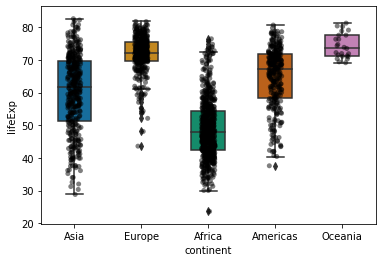

In [48]:
#Here, we're plotting the life expectancy in function of the continent.:

sns.boxplot(x = 'continent', y = 'lifeExp', data = gapminder, width = 0.5, palette = 'colorblind')
sns.stripplot( x = 'continent', y = 'lifeExp', data = gapminder, jitter = True, marker = 'o', alpha = 0.5, color = 'black')


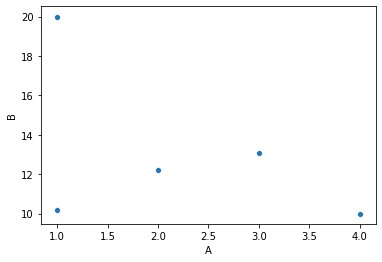

In [60]:
#Using scatterplot, we usually the predictor variable (independent variable) on x axis and the target on y axis:

sns.scatterplot(x = "A", y = "B", data = df)

### Grouping data: GroupBy Method

Assume you want to know: Is there any relationship between the different types of “drive system”
(forward, rear and four-wheel drive) and the “price” of the vehicles?
If so, which type of “drive system” adds the most value to a vehicle?
It would be nice if we could group all the data by the different types of drive wheels,
and compare the results of these different drive wheels against each other.
In pandas this can be done using the group by method.

In [67]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot', 'Falcon', 'Falcon', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.,375.,372., 24.]})

df


,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0
4,Falcon,375.0
5,Falcon,372.0
6,Parrot,24.0


In [69]:
#Here, we're able to see the influence of each different animal species on the speed
df.groupby(['Animal']).mean()


,Max Speed
Animal,
Falcon,374.250000
Parrot,24.666667


In [73]:
# The pivot method return reshaped DataFrame organized by given index / column values.


df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [74]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [75]:
df.pivot(index='bar', columns='foo', values='baz')

foo,one,two
bar,,
A,1,4
B,2,5
C,3,6


#### Heatmaps: visualizing frequency 

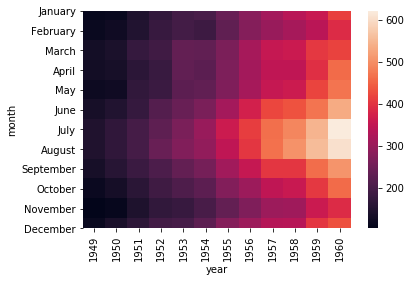

In [78]:
#
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

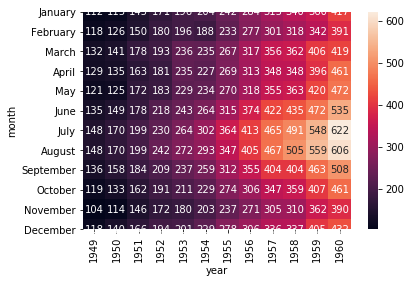

In [79]:
ax = sns.heatmap(flights, annot=True, fmt="d")

### Analysis of Variance (ANOVA)

The ANOVA test returns two values: The F-test score and the p-value. 
* The F-test score calculates the ratio of variation between the group's mean over the variation within each of the sample groups.

* The p-value shows wether the obtained result is statistically significant. 

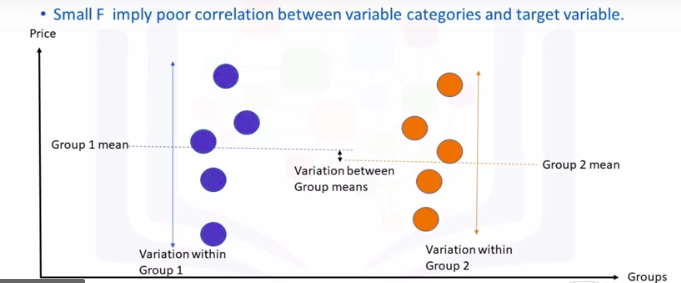

Above, we can guess that the f-test score will be low because the correlation between the group means and the variation within each group is small.

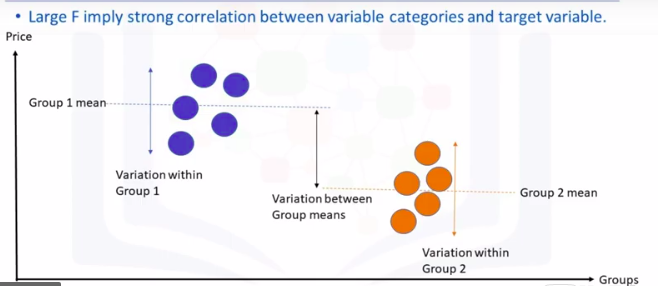


Above, we can guess that the f-test score will be higher than the preview example, because the correlation between the variation between group means and the variation of each group are higher. We can confirm our guesses by using the scipy Anova built in function: 

In [18]:
import scipy.stats as stats
import pandas as pd
df = pd.read_csv('automobile.csv')

df_anova = df[["make","price"]]
grouped_anova  = df_anova.groupby(['make'])
grouped_anova.head(2)

,make,price
0,alfa-romero,13495
1,alfa-romero,16500
3,audi,13950
4,audi,17450
10,bmw,16430
11,bmw,16925
18,chevrolet,5151
19,chevrolet,6295
21,dodge,5572
22,dodge,6377


In [24]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [26]:
anova_results_2 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

The price between the honda and subaru are simiar, as that f-score is small. The high f-score between jaguar and honda implies that the prices between honda and jaguar are pretty discrepant. 

### Correlation

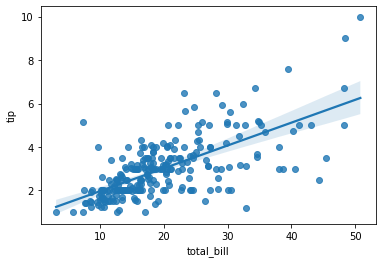

In [31]:
#Correlation between two features: total_bill and tip. The sloop of the curve will tell us if the variable used
#to predict the values. If the slope is low, there are too much random values and they don't contribute for the model.
import seaborn as sns

tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

An example of a weak correlatiom between two features: 

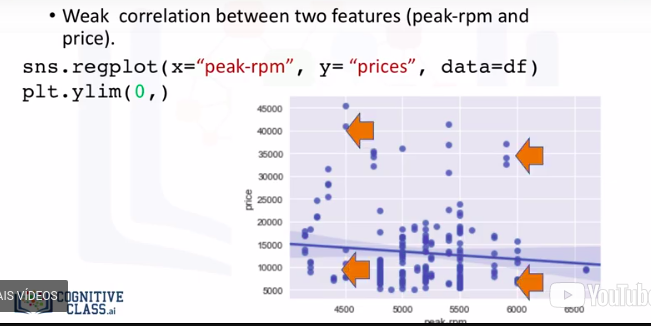

#### Pearson Correlation

The Pearson Correlation measure the strenght of the correlation between two features. It returns two variables:

Correlation coefficient:

* close to +1: Large positive relationship
* close to 0: No relatioship
* CLose to -1: Large negative relationship

P-value:

* P-value < 0.001 : Strong certainty in the result
* P-value < 0.05 :  Moderate certainty in the result
* P-value < 0.1:    Weak certainty in the result
* P-valie > 0.1:    No certainty in the result

In [44]:
# Here we have a large positive relationship but with a weak certainty.
from scipy import stats
import numpy as np

a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)
stats.pearsonr(a, b)   

(0.8660254037844386, 0.011724811003954649)

You already know that if you have a data set with many columns, a 
good way to quickly check correlations among 
columns is by visualizing the correlation matrix as a heatmap.

[Text(0.5, 0, ' symboling'),
 Text(1.5, 0, 'normalized-losses'),
 Text(2.5, 0, 'wheel-base'),
 Text(3.5, 0, 'length'),
 Text(4.5, 0, 'width'),
 Text(5.5, 0, 'height'),
 Text(6.5, 0, 'curb-weight'),
 Text(7.5, 0, 'engine-size'),
 Text(8.5, 0, 'bore'),
 Text(9.5, 0, 'stroke'),
 Text(10.5, 0, 'compression-ratio'),
 Text(11.5, 0, 'horsepower'),
 Text(12.5, 0, 'peak-rpm'),
 Text(13.5, 0, 'city-mpg'),
 Text(14.5, 0, 'highway-mpg'),
 Text(15.5, 0, 'price')]

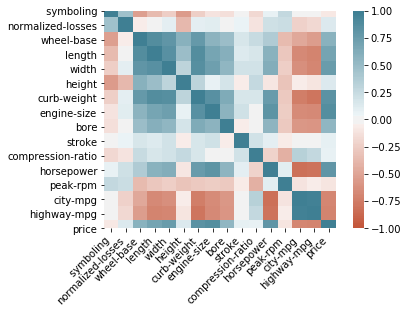

In [45]:

data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In the graph, the correlation in the diagonal is stronger because it's the correlation between the variables and themselves.